In [8]:
#Hyperparameters

BATCH_SIZE=64
lr=0.0005
NUM_EPOCHS=100
DEVICE='cuda'


In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch. nn as nn 
import torch.nn.functional as F

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the images
])

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Download and load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Example of iterating through the data loader
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Just to show the first batch


Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


In [10]:
from VAE import *
config=VAEConfig()
model=VAE(config)

model.to(DEVICE)
optimizer=torch.optim.Adam(model.parameters(), lr=lr)

In [11]:
train_loss_list=[]
test_loss_list=[]
best_loss=torch.inf
for epoch in range(NUM_EPOCHS):
 model.train()
 train_loss=0
 print("EPoch ",epoch)
 for images,_ in train_loader:
     images=images.to(DEVICE)
     out=model(images)
     loss=model.calc_loss(images,out)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     train_loss+=loss.item()
 train_loss=train_loss/len(train_loader)
 train_loss_list.append(train_loss)
 print(f"Train loss is {train_loss}")
 test_loss=0
 model.eval()
 for images,_ in test_loader:
     images=images.to(DEVICE)
     with torch.no_grad():
      out=model(images)
      loss=model.calc_loss(images,out)
      test_loss+=loss.item()
 test_loss=test_loss/len(test_loader)
 test_loss_list.append(test_loss)
 print(f"Test loss is {test_loss}")
 if test_loss<best_loss:
    torch.save(model.state_dict(), f"model_best.pth")
    best_loss=test_loss
 

EPoch  0
Train loss is 0.7822696371500426
Test loss is 0.7493767032198085
EPoch  1
Train loss is 0.7450313029894188
Test loss is 0.7467707084242705
EPoch  2
Train loss is 0.742761236581721
Test loss is 0.7445939919751161
EPoch  3
Train loss is 0.7417381111619823
Test loss is 0.7438303342290745
EPoch  4
Train loss is 0.7412059127267744
Test loss is 0.743738188485431
EPoch  5
Train loss is 0.7441315025027627
Test loss is 0.7452135078466622
EPoch  6
Train loss is 0.7405262248221237
Test loss is 0.7431857680818837
EPoch  7
Train loss is 0.7401982303113063
Test loss is 0.7435836586982582
EPoch  8
Train loss is 0.7399402965487701
Test loss is 0.742454300640495
EPoch  9
Train loss is 0.739827856008432
Test loss is 0.7428281102210853
EPoch  10
Train loss is 0.7397090771050849
Test loss is 0.7426230770767115
EPoch  11
Train loss is 0.7395888448778246
Test loss is 0.7421697974205017
EPoch  12
Train loss is 0.7395842489021928
Test loss is 0.742033141433813
EPoch  13
Train loss is 0.73940971112454

KeyboardInterrupt: 

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_loss(data, title):
# Plotting the data
 plt.plot(data)

 # Adding a title and labels
 plt.title(title)
 plt.xlabel('Index')
 plt.ylabel('Value')

 # Display the plot
 plt.show()

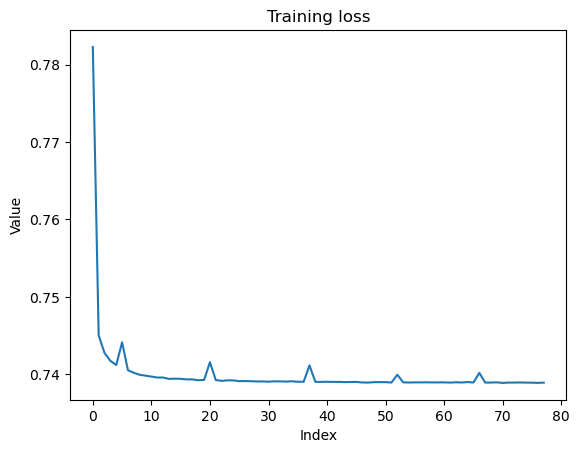

In [13]:
plot_loss(train_loss_list, "Training loss")

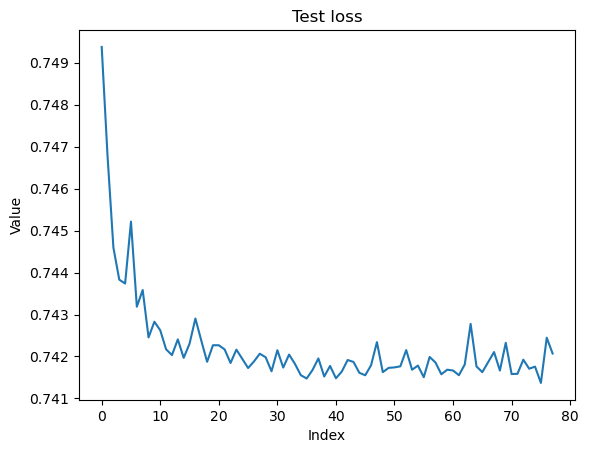

In [14]:
plot_loss(test_loss_list, "Test loss")

In [8]:
import math
def plot_images(tensor):
    # Check if tensor has the correct shape
    if tensor.ndimension() != 4 or tensor.size(1) != 1 or tensor.size(2) != 28 or tensor.size(3) != 28:
        raise ValueError("Tensor must have shape (BATCH_SIZE, 1, 28, 28)")
    
    # Determine the batch size
    batch_size = tensor.size(0)
    
    # Determine the number of rows and columns for the plot grid

    rows = math.ceil(batch_size**0.5)
    cols = rows
    print(rows,cols)
    
    # Plot the images
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    axes = axes.flatten()

    for i in range(batch_size):
        image = tensor[i].squeeze(0)  # Remove the channel dimension (1, 28, 28) -> (28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

8 8


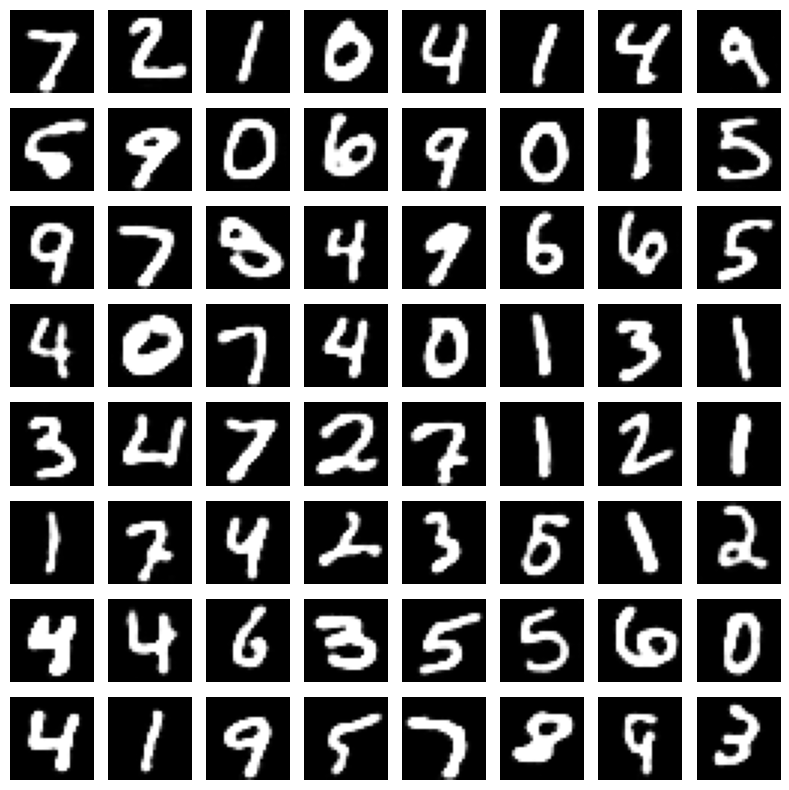

torch.Size([64, 1, 28, 28])


In [9]:
for images,_ in test_loader:
    images=images.to(DEVICE)
    out=model(images)
    plot_images(out.cpu().detach())
    print(out.shape)
    break
    

8 8


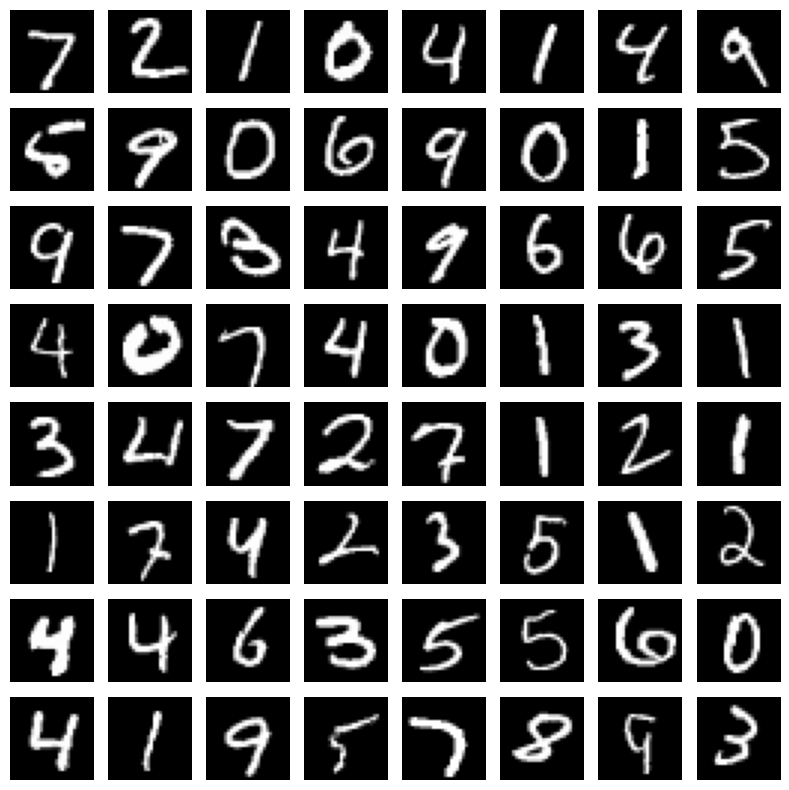

torch.Size([64, 1, 28, 28])


In [10]:
for images,_ in test_loader:
    plot_images(images)
    print(out.shape)
    break

Sampling from a normal distribution and generating images

In [13]:
model.load_state_dict(torch.load("model_best.pth"))
model.eval()
latent_vectors=torch.randn(32,64).to("cuda")
images=model.decode(latent_vectors)

6 6


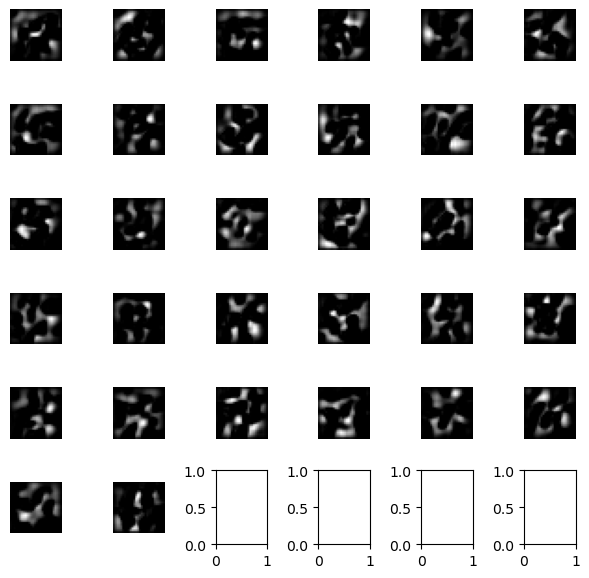

In [14]:
plot_images(images.cpu().detach())